In [29]:
import pandas as pd
import numpy as np
import io

In [88]:
df=pd.read_csv(r'C:\Users\Administrator\Downloads\py-master\py-master\DataScience\BangloreHomePrices\model\bengaluru_house_prices.csv',parse_dates=True)

In [89]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec-21,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,May-21,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,May-21,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,May-21,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,May-21,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [90]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec-21,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,May-21,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,May-21,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,May-21,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,May-21,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [91]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [92]:
df["area_type"]=df["area_type"].astype("category")
df["location"]=df["location"].astype("category")
df["society"]=df["society"].astype("category")
df["size"]=df["size"].astype("category")

In [93]:
df.dtypes

area_type       category
availability      object
location        category
size            category
society         category
total_sqft        object
bath             float64
balcony          float64
price            float64
dtype: object

In [94]:
df["availability"]= df["availability"].str.replace("-21", "", case = False)


In [95]:
df = df.assign( size = lambda x: x['size'].str.extract('(\d+)'))

In [96]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,May,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,May,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,May,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,May,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [97]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [98]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [99]:
df['bath']=df['bath'].fillna(df['bath'].mean())
df['balcony']=df['balcony'].fillna(df['balcony'].mean())

In [108]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [111]:
df['society'] = df['society'].astype('string')
df['society'].fillna('Unknown', inplace =True)
df['society'] = df['society'].astype('category')

In [112]:
df.isnull().sum()

area_type       0
availability    0
location        1
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [113]:
df=df.dropna()

<AxesSubplot:>

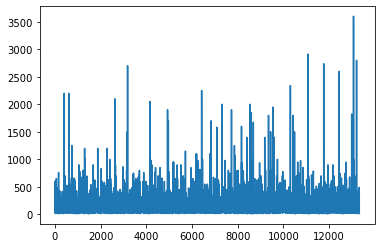

In [114]:
df['price'].plot() # This is not following ND

# There are many outliers in price 

In [115]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

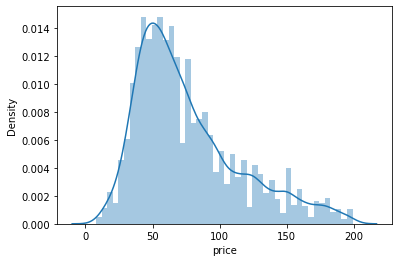

In [116]:
sns.distplot(df[df['price']<200].price)

In [117]:
df[df['price']<200].price.count()

11742

In [118]:
df[df['price']>200].price.count()

1474

In [119]:
df=df[df['price']<200]

In [120]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,May,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,May,Uttarahalli,3,Unknown,1440,2.0,3.0,62.00
3,Super built-up Area,May,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,May,Kothanur,2,Unknown,1200,2.0,1.0,51.00


In [121]:
df.describe()

,bath,balcony,price
count,11742.000000,11742.000000,11742.000000
mean,2.472041,1.560171,76.025562
std,1.054879,0.785265,38.815908
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,47.267500
50%,2.000000,2.000000,65.000000
75%,3.000000,2.000000,95.000000
max,15.000000,3.000000,199.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bath', ylabel='Density'>

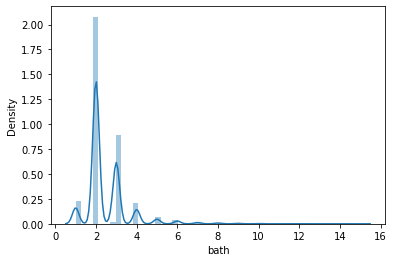

In [122]:
sns.distplot(df['bath'])

In [123]:
df[df['bath']<3].bath.count()

7654

In [124]:
df=df[df['bath']<3]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bath', ylabel='Density'>

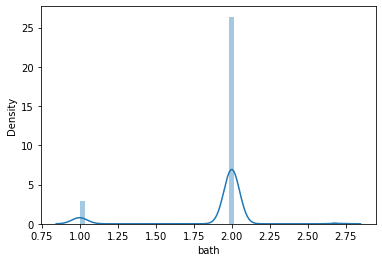

In [125]:
sns.distplot(df['bath'])

In [126]:
df.describe()

,bath,balcony,price
count,7654.000000,7654.000000,7654.000000
mean,1.904718,1.422052,58.928192
std,0.307138,0.726355,26.259046
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,42.000000
50%,2.000000,1.000000,54.500000
75%,2.000000,2.000000,70.000000
max,2.692610,3.000000,198.000000


In [127]:
df.dtypes

area_type       category
availability      object
location        category
size              object
society         category
total_sqft        object
bath             float64
balcony          float64
price            float64
dtype: object

In [129]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
2,Built-up Area,May,Uttarahalli,3,Unknown,1440,2.0,3.0,62.00
4,Super built-up Area,May,Kothanur,2,Unknown,1200,2.0,1.0,51.00
5,Super built-up Area,May,Whitefield,2,DuenaTa,1170,2.0,1.0,38.00
10,Super built-up Area,Feb,Whitefield,3,Unknown,1800,2.0,2.0,70.00


In [130]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['area_type']= label_encoder.fit_transform(df['area_type'])

In [131]:
# Encode labels in column 'species'.
df['availability']= label_encoder.fit_transform(df['availability'])

In [132]:
# Encode labels in column 'species'.
df['location']= label_encoder.fit_transform(df['location'])

In [135]:
df.drop("society",axis=1,inplace=True)

In [136]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,2,283,2,1056,2.0,1.0,39.07
2,0,9,820,3,1440,2.0,3.0,62.00
4,3,9,509,2,1200,2.0,1.0,51.00
5,3,9,876,2,1170,2.0,1.0,38.00
10,3,3,876,3,1800,2.0,2.0,70.00


In [146]:
df=df[df["total_sqft"]!="1042 - 1105"]

In [151]:
df['total_sqft'][0]

'1056'

In [156]:
df['total_sqft'].count()

7652

In [159]:
str(df['total_sqft'][10]).split('-')

['1800']

In [160]:
for i in range(0, 7652):
    pr=str(df['total_sqft'][i]).split('-')
    print(pr)

['1056']


KeyError: 1

In [ ]:
[x for x in df['total_sqft'] str(df['total_sqft'][i]).split('-')]

In [168]:
pd.Series(df['total_sqft']).values

array(['1056', '1440', '1200', ..., '1345', '1141', '550'], dtype=object)

In [175]:
df.describe()

,area_type,availability,location,bath,balcony,price
count,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000,7652.000000
mean,2.377418,8.064036,463.572399,1.904602,1.422216,58.911445
std,1.164096,2.474669,258.076974,0.307044,0.726266,26.218311
min,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000
25%,3.000000,9.000000,268.000000,2.000000,1.000000,42.000000
50%,3.000000,9.000000,449.000000,2.000000,1.000000,54.500000
75%,3.000000,9.000000,686.000000,2.000000,2.000000,70.000000
max,3.000000,12.000000,907.000000,2.692610,3.000000,198.000000


In [173]:
df = df.assign( total_sqft = lambda x: x['total_sqft'].str.extract('(\d+)'))

In [174]:
df['total_sqft']

0        1056
2        1440
4        1200
5        1170
10       1800
         ... 
13310    1050
13312    1262
13313    1345
13317    1141
13319     550
Name: total_sqft, Length: 7652, dtype: object

In [186]:
df["price"]=df["price"].astype("float")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

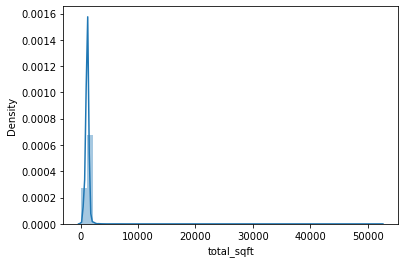

In [177]:
sns.distplot(df['total_sqft'])

In [178]:
df=df[df['total_sqft']<10000]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

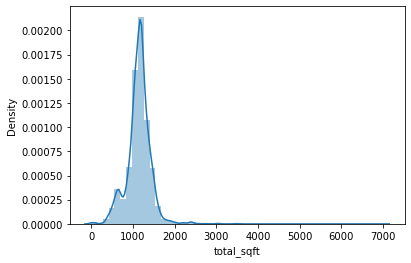

In [179]:
sns.distplot(df['total_sqft'])

In [180]:
df=df[df['total_sqft']<2000]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

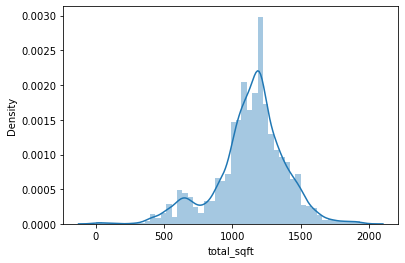

In [181]:
sns.distplot(df['total_sqft'])

In [184]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [190]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=df.drop(["price"],axis=1)
y=df['price']

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=7)
ordered_feature=ordered_rank_features.fit(X,y)


ValueError: Unknown label type: (array([39.07, 62.  , 51.  , ..., 57.  , 60.  , 17.  ]),)

In [189]:
df.dtypes

area_type         int32
availability      int32
location          int32
size            float64
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [188]:
df["size"]=df["size"].astype("float")

In [194]:
y.shape

(7582,)

In [195]:
df.corr()

,area_type,availability,location,size,total_sqft,bath,balcony,price
area_type,1.000000,-0.051773,0.047590,0.033086,0.115288,0.073913,0.116175,0.007007
availability,-0.051773,1.000000,0.002107,0.073350,0.061721,0.039586,0.114318,0.076974
location,0.047590,0.002107,1.000000,-0.005516,0.037448,0.020689,0.005645,0.036130
size,0.033086,0.073350,-0.005516,1.000000,0.615061,0.553253,0.246059,0.311435
total_sqft,0.115288,0.061721,0.037448,0.615061,1.000000,0.565729,0.330858,0.520977
bath,0.073913,0.039586,0.020689,0.553253,0.565729,1.000000,0.287969,0.241501
balcony,0.116175,0.114318,0.005645,0.246059,0.330858,0.287969,1.000000,0.072791
price,0.007007,0.076974,0.036130,0.311435,0.520977,0.241501,0.072791,1.000000


<AxesSubplot:>

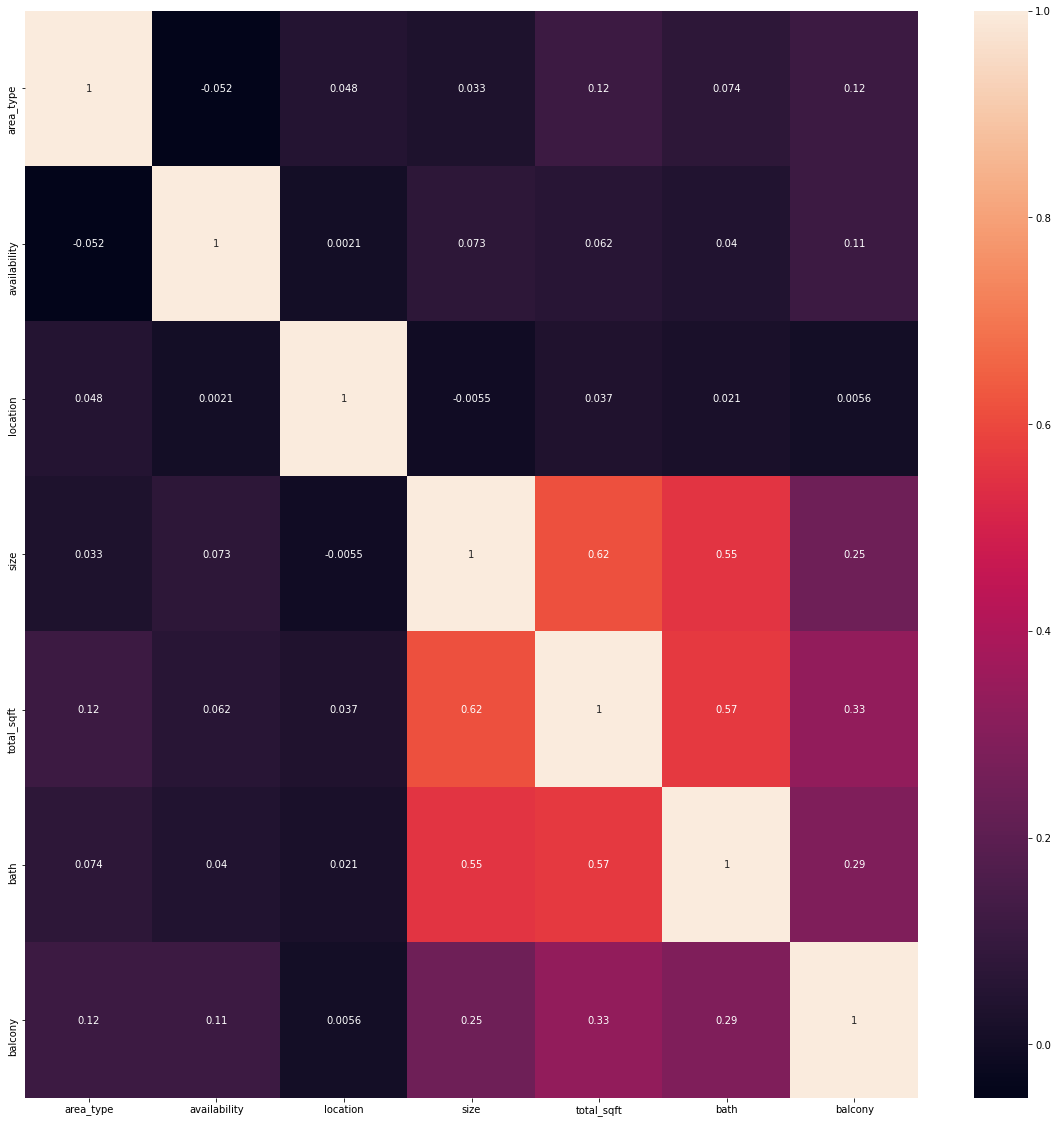

In [196]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [197]:
threshold=0.8
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [198]:
correlation(df.iloc[:,:-1],threshold)

set()

ValueError: Unknown label type: 'continuous'

In [236]:
df=df.drop(["location","size"],axis=1)

In [237]:
y = df['price']
x=df.drop(["price"],axis=1,inplace=False)

In [238]:
x.head()

,area_type,availability,total_sqft,bath,balcony
0,3,2,1056.0,2.0,1.0
2,0,9,1440.0,2.0,3.0
4,3,9,1200.0,2.0,1.0
5,3,9,1170.0,2.0,1.0
10,3,3,1800.0,2.0,2.0


In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, y_train, y_test  = train_test_split(x,y,test_size=0.2, random_state=100)

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
clf = RandomForestRegressor(max_depth=8,n_estimators=200,min_samples_leaf=45,min_samples_split=110
                            #max_samples =1.0 introduced from version 0.22 
                            )

In [206]:
clf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=45, min_samples_split=110,
                      n_estimators=200)

In [207]:

preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)

In [208]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, preds_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, preds_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, preds_train)))
print('Mean Absolute Percentage Error(MPAE):', np.mean(((abs(y_train-preds_train))/y_train)*100)) 

Mean Absolute Error: 13.410344015121346
Mean Squared Error: 374.558617388418
Root Mean Squared Error: 19.353516925572418
Mean Absolute Percentage Error(MPAE): 25.17243640838448


In [ ]:

preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)

In [210]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_test)))
print('Mean Absolute Percentage Error(MPAE):', np.mean(((abs(y_test-preds_test))/y_test)*100)) 

Mean Absolute Error: 13.479426038836682
Mean Squared Error: 369.5938198361336
Root Mean Squared Error: 19.224823011828576
Mean Absolute Percentage Error(MPAE): 25.933446208418548


In [211]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']}


In [212]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [213]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 670,
 'criterion': 'mse'}

In [215]:
best_random_grid=rf_randomcv.best_estimator_

In [254]:
#best_random_grid.predict(X_test)
preds_train = best_random_grid.predict(X_train)
preds_test = best_random_grid.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 5 

In [217]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, preds_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, preds_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, preds_train)))
print('Mean Absolute Percentage Error(MPAE):', np.mean(((abs(y_train-preds_train))/y_train)*100)) 

Mean Absolute Error: 8.715402706309494
Mean Squared Error: 171.75130444989458
Root Mean Squared Error: 13.105392189854319
Mean Absolute Percentage Error(MPAE): 16.01774313993555


In [218]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_test)))
print('Mean Absolute Percentage Error(MPAE):', np.mean(((abs(y_test-preds_test))/y_test)*100))

Mean Absolute Error: 12.009721763693088
Mean Squared Error: 307.9248751341487
Root Mean Squared Error: 17.547788326001335
Mean Absolute Percentage Error(MPAE): 22.922219371140628


In [241]:
from sklearn.linear_model import LinearRegression

In [242]:
reg = LinearRegression().fit(X_train,y_train)

In [243]:
reg.coef_

array([-0.86787985,  0.51060858,  0.05829656, -5.11123551, -4.09044285])

In [244]:
reg.intercept_

5.876321316620036

In [245]:
#best_random_grid.predict(X_test)
preds_train = reg.predict(X_train)
preds_test = reg.predict(X_test)

In [246]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, preds_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, preds_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, preds_train)))
print('Mean Absolute Percentage Error(MPAE):', np.mean(((abs(y_train-preds_train))/y_train)*100)) 

Mean Absolute Error: 14.913476120044848
Mean Squared Error: 455.3338919244056
Root Mean Squared Error: 21.338554119818088
Mean Absolute Percentage Error(MPAE): 28.06369115873077


In [247]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_test)))
print('Mean Absolute Percentage Error(MPAE):', np.mean(((abs(y_test-preds_test))/y_test)*100))

Mean Absolute Error: 14.636659529914866
Mean Squared Error: 427.2076388940311
Root Mean Squared Error: 20.669001884320178
Mean Absolute Percentage Error(MPAE): 28.19711228549179


In [248]:
import statsmodels.api as sm

In [249]:
X_train['Intercept'] = 1

<ipython-input-249-de596054950b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Intercept'] = 1


In [251]:
## Statmodels logistic regrssion
import statsmodels.api as sm
sreg = sm.OLS(y_train, X_train)
result = sreg.fit()

In [252]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     483.8
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        10:26:28   Log-Likelihood:                -27168.
No. Observations:                6065   AIC:                         5.435e+04
Df Residuals:                    6059   BIC:                         5.439e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
area_type       -0.8679      0.239     -3.634   

In [253]:
X_train.drop(["Intercept"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
